In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis  # for work with several models
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
df = pd.read_csv("Breast Cancer Wisconsin.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.shape

(569, 33)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# Data Wrangling

In [6]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
# "Unnamed: 32" has more missing values

df.drop(["id", "Unnamed: 32"], axis = 1, inplace = True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Descriptive Analysis

In [8]:
# There has one categorical variable (cheack class inbalance)

df["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


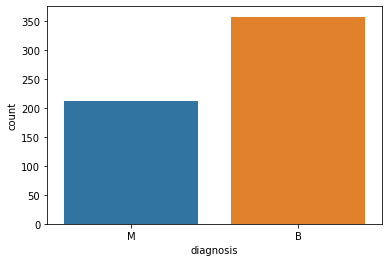

In [9]:
sns.countplot(df["diagnosis"])
plt.show()

In [10]:
df.iloc[:, 1:].describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [11]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [12]:
df.iloc[:, 1:].describe()["fractal_dimension_worst"]

count    569.000000
mean       0.083946
std        0.018061
min        0.055040
25%        0.071460
50%        0.080040
75%        0.092080
max        0.207500
Name: fractal_dimension_worst, dtype: float64

In [13]:
# cheacking description for each category

df.groupby("diagnosis").agg(["mean", "max", "median"])

radius_mean                texture_mean                \
                 mean    max  median         mean    max median   
diagnosis                                                         
B           12.146524  17.85  12.200    17.914762  33.81  17.39   
M           17.462830  28.11  17.325    21.604906  39.28  21.46   

          perimeter_mean                  area_mean  ... concavity_worst  \
                    mean    max  median        mean  ...          median   
diagnosis                                            ...                   
B              78.075406  114.6   78.18  462.790196  ...          0.1412   
M             115.365377  188.5  114.20  978.376415  ...          0.4049   

          concave points_worst                 symmetry_worst                  \
                          mean    max   median           mean     max  median   
diagnosis                                                                       
B                     0.074444  0.175  0.07431       0.270246  0.4228  0.2687   
M                     0.182237  0.291  0.18200       0.323468  0.6638  0.3103   

          fractal_dimension_worst                   
                             mean     max   median  
diagnosis                                           
B                        0.079442  0.1486  0.07712  
M                        0.091530  0.2075  0.08760  

[2 rows x 90 columns]

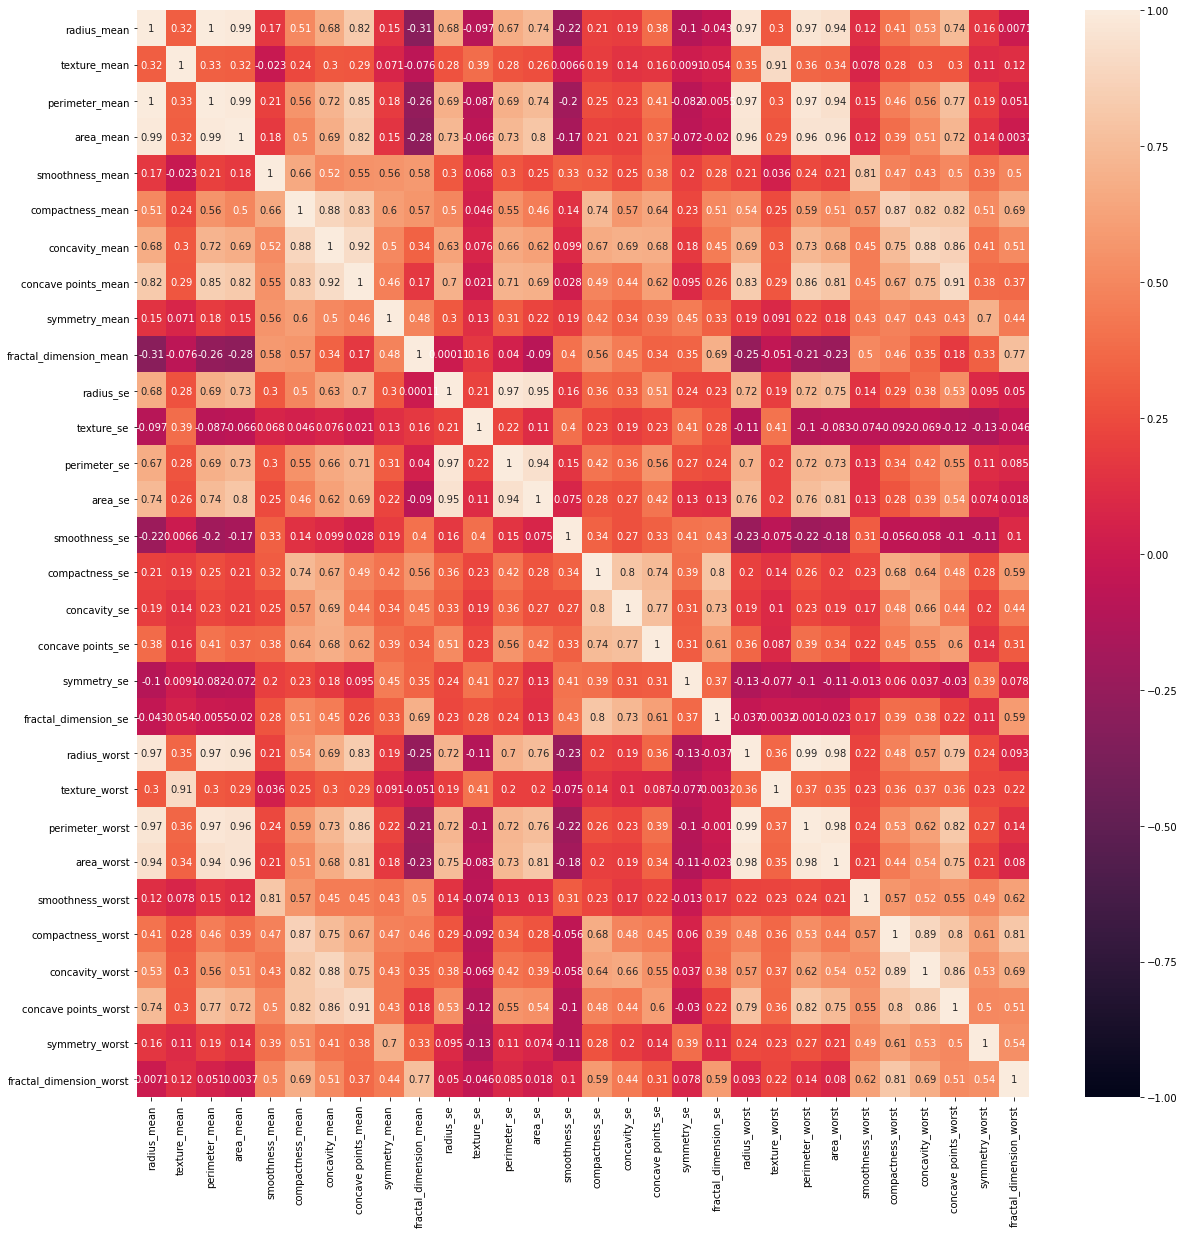

In [14]:
# cheack correlation

plt.figure(figsize = (20, 20))
sns.heatmap(df.iloc[:, 1:].corr(), annot = True, vmax = 1, vmin = -1)
plt.show()

# Model building

In [15]:
x = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [16]:
# Standardising

se = StandardScaler()
x = se.fit_transform(x)
x

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [17]:
def fun_ML(idx):
    
    models=[LogisticRegression(),
            KNeighborsClassifier(n_neighbors=10),
            RandomForestClassifier(random_state=0),
            LinearDiscriminantAnalysis(),
            QuadraticDiscriminantAnalysis(),
            SVC(random_state=15),
            DecisionTreeClassifier(random_state=10), 
            AdaBoostClassifier()]
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
    
    model = models[idx]
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    
    return accuracy_score(y_pred, y_test)

In [18]:
print("LogisticRegression - ", fun_ML(0))
print("KNeighborsClassifier - ", fun_ML(1))
print("RandomForestClassifier - ", fun_ML(2))
print("LinearDiscriminantAnalysis - ", fun_ML(3))
print("QuadraticDiscriminantAnalysis - ", fun_ML(4))
print("SVC - ", fun_ML(5))
print("DecisionTreeClassifier - ", fun_ML(6))
print("AdaBoostClassifier - ", fun_ML(7))

LogisticRegression -  0.9649122807017544
KNeighborsClassifier -  0.9473684210526315
RandomForestClassifier -  0.9649122807017544
LinearDiscriminantAnalysis -  0.9649122807017544
QuadraticDiscriminantAnalysis -  0.956140350877193
SVC -  0.9736842105263158
DecisionTreeClassifier -  0.9122807017543859
AdaBoostClassifier -  0.9649122807017544


SVC seem to has high performance(other models have lower performance).

# KFOLD

In [19]:
### KFOLD cross validation and hyperparameter tunning for LOGISTIC REGRESSION

penalty_values = ['l1', 'l2', 'elasticnet']
class_weight_values = ['balanced']
solver_values = ['liblinear']

param_grid = dict(penalty=penalty_values,class_weight=class_weight_values,solver=solver_values)
model = LogisticRegression()
kFold = KFold(n_splits=10)

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy',cv=kFold) 

## Fit the model 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
grid_result = grid.fit(x_train,y_train)
print("Best score: %f" % (grid_result.best_score_))
print(grid_result.best_params_)

Best score: 0.971498
{'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 457, in _check_solver
    raise ValueError(
ValueErr

In [20]:
model = LogisticRegression(class_weight='balanced', penalty='l1', solver='liblinear')
model.fit(x_train,y_train)

predictions_logisticRegression = model.predict(x_test)
print("Accuracy score %f" % accuracy_score(y_test, predictions_logisticRegression))

Accuracy score 0.956140


In [21]:
### KFOLD cross validation and hyperparameter tunning for SVC

c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']

param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()

kFold = KFold(n_splits=10)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kFold)

## Fit the model
grid_result = grid.fit(x_train,y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.978116 using {'C': 0.1, 'kernel': 'linear'}
0.978116 (0.021838) with: {'C': 0.1, 'kernel': 'linear'}
0.830725 (0.039284) with: {'C': 0.1, 'kernel': 'poly'}
0.945217 (0.031080) with: {'C': 0.1, 'kernel': 'rbf'}
0.947295 (0.024241) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.978019 (0.024081) with: {'C': 0.3, 'kernel': 'linear'}
0.874686 (0.039291) with: {'C': 0.3, 'kernel': 'poly'}
0.956135 (0.025891) with: {'C': 0.3, 'kernel': 'rbf'}
0.958357 (0.026608) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.975845 (0.022954) with: {'C': 0.5, 'kernel': 'linear'}
0.885652 (0.030828) with: {'C': 0.5, 'kernel': 'poly'}
0.969275 (0.024280) with: {'C': 0.5, 'kernel': 'rbf'}
0.962705 (0.027782) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.973720 (0.025404) with: {'C': 0.7, 'kernel': 'linear'}
0.883527 (0.032546) with: {'C': 0.7, 'kernel': 'poly'}
0.973720 (0.025404) with: {'C': 0.7, 'kernel': 'rbf'}
0.958309 (0.024815) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.969372 (0.031065) with: {'C': 0.9, 'kernel': 'line

In [22]:
model = SVC(C=0.1, kernel='linear')
model.fit(x_train,y_train)

predictions_SVC = model.predict(x_test)
print("Accuracy score %f" % accuracy_score(y_test, predictions_SVC))

Accuracy score 0.973684


In [23]:
## Having a look at misclassified points for SVC

print(classification_report(y_test, predictions_SVC, digits=3))

cfm = confusion_matrix(y_test, predictions_SVC)

true_negative = cfm[0][0]
false_positive = cfm[0][1]
false_negative = cfm[1][0]
true_positive = cfm[1][1]

print('=====================================================')

print('Confusion Matrix: \n', cfm, '\n')

print('=====================================================')

print('True Negative:', true_negative)
print('False Positive:', false_positive)
print('False Negative:', false_negative)
print('True Positive:', true_positive)

              precision    recall  f1-score   support

           B      0.971     0.985     0.978        67
           M      0.978     0.957     0.968        47

    accuracy                          0.974       114
   macro avg      0.974     0.971     0.973       114
weighted avg      0.974     0.974     0.974       114

Confusion Matrix: 
 [[66  1]
 [ 2 45]] 

True Negative: 66
False Positive: 1
False Negative: 2
True Positive: 45
